# Dataset (qknmc) Overview

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
DATASET_ID = "qknmc"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True

In [4]:
import sys
sys.path.append('../../')

from tsdr import tsdr
from eval import groundtruth
from meltria import loader

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
metrics_files = !find "/datasets/argowf-chaos-{DATASET_ID}/" -type f -name "*.json"
dataset_generator = loader.load_dataset_as_generator(metrics_files, target_metric_types={
        "containers": True,
        "services": True,
        "nodes": True,
        "middlewares": True,
    },
    num_datapoints=180,
)
records = [r for rec in dataset_generator for r in rec]

In [13]:
from meltria.loader import DatasetRecord

def get_well_injected_fault_dataset(_datasets) -> list[tuple[DatasetRecord, pd.DataFrame, pd.DataFrame, pd.DataFrame]]:
    well_injected_fault_dataset_entries_texts: list[str] = """
carts/pod-cpu-hog/0
carts-db/pod-memory-hog/0
payment/pod-cpu-hog/0
user/pod-cpu-hog/0
catalogue-db/pod-memory-hog/0
catalogue/pod-cpu-hog/0
orders/pod-network-loss/0
orders/pod-cpu-hog/0
catalogue-db/pod-cpu-hog/0
user-db/pod-memory-hog/0
orders/pod-memory-hog/0
carts-db/pod-cpu-hog/0
orders-db/pod-cpu-hog/0
orders-db/pod-network-loss/0
orders-db/pod-memory-hog/0
user/pod-network-loss/0
payment/pod-network-loss/0
catalogue/pod-network-loss/0
catalogue-db/pod-network-loss/0
payment/pod-memory-hog/0
front-end/pod-memory-hog/0
user/pod-memory-hog/0
user-db/pod-cpu-hog/0
catalogue/pod-memory-hog/0
carts/pod-network-loss/0
front-end/pod-cpu-hog/0
carts-db/pod-network-loss/0
carts/pod-memory-hog/0
user-db/pod-network-loss/0
    """.splitlines()
    well_injected_fault_dataset_entries: list[tuple[str, str]] = [
        tuple(line.rstrip("/0").split("/")) for line in well_injected_fault_dataset_entries_texts
    ][1:]

    well_injected_fault_datasets = [
        (record, filtered_df, anomalous_df, reduced_df) 
        for record, filtered_df, anomalous_df, reduced_df in _datasets 
        if (record.chaos_comp(), record.chaos_type()) in well_injected_fault_dataset_entries
    ]
    return well_injected_fault_datasets

In [6]:
import sys
sys.path.append("../")
from notebooklib.save import run_tsdr, save_tsdr, load_tsdr

In [16]:
list_of_record_and_reduced_df = get_well_injected_fault_dataset(run_tsdr(records))

In [17]:
for a, b, c, d in list_of_record_and_reduced_df:
    save_tsdr(DATASET_ID, a, b, c, d)

In [18]:
list_of_record_and_reduced_df_pearsonr = get_well_injected_fault_dataset(run_tsdr(records, tsdr_options={
    "step2_dbscan_dist_type": "pearsonr",
    "step2_dbscan_algorithm": "hdbscan",
}))

In [19]:
for a, b, c, d in list_of_record_and_reduced_df_pearsonr:
    save_tsdr(DATASET_ID, a, b, c, d, suffix="hdbscan_pearsonr")

In [20]:
list_of_record_and_reduced_df_fluxrank = get_well_injected_fault_dataset(run_tsdr(records, tsdr_options={
    "step2_clustering_method_name": "dbscan",
    "step2_dbscan_min_pts": 1,
    "step2_dbscan_dist_type": "pearsonr",  # 'pearsonr' or 'sbd'
    "step2_dbscan_algorithm": "dbscan",  # 'dbscan' or 'hdbscan'
    "step2_clustering_series_type": "raw",  # 'raw', 'anomaly_score' or 'binary_anomaly_score'
    "step2_clustering_choice_method": 'medoid',  # 'medoid' or 'maxsum'
}))

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:206: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  warnings.warn(


In [29]:
for a, b, c, d in list_of_record_and_reduced_df_fluxrank:
    save_tsdr(DATASET_ID, a, b, c, d, suffix="fluxrank")

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 

In [22]:
list_of_record_and_reduced_df_fluxrank = get_well_injected_fault_dataset(run_tsdr(records, tsdr_options={
    "step2_clustering_method_name": "dbscan",
    "step2_dbscan_min_pts": 1,
    "step2_dbscan_dist_type": "pearsonr",  # 'pearsonr' or 'sbd'
    "step2_dbscan_algorithm": "dbscan",  # 'dbscan' or 'hdbscan'
    "step2_clustering_series_type": "raw",  # 'raw', 'anomaly_score' or 'binary_anomaly_score'
    "step2_clustering_choice_method": "max_cluster",  # 'medoid' or 'maxsum'
}))
for a, b, c, d in list_of_record_and_reduced_df_fluxrank:
    save_tsdr(DATASET_ID, a, b, c, d, suffix="fluxrank_max_cluster")

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:206: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  warnings.warn(


In [23]:
list_of_record_and_reduced_df_hier_sbd = get_well_injected_fault_dataset(run_tsdr(records, tsdr_options={
    "step2_clustering_method_name": "hierarchy",
    "step2_hierarchy_dist_threshold": 0.02,  # should be <1.0 if 'sbd' is specified
    "step2_hierarchy_dist_type": "sbd",  # 'pearsonr' or 'sbd'
    "step2_hierarchy_linkage_method": "single",  # 'single','complete','average','weighted', 'centroid', 'median', 'ward'
}))

In [24]:
for a, b, c, d in list_of_record_and_reduced_df_hier_sbd:
    save_tsdr(DATASET_ID, a, b, c, d, suffix="hier_sbd")

In [7]:
datasets_after_tsdr = load_tsdr(DATASET_ID)

1: carts/pod-cpu-hog/0
2: carts-db/pod-memory-hog/0
3: payment/pod-cpu-hog/0
4: user/pod-cpu-hog/0
5: catalogue-db/pod-memory-hog/0
6: catalogue/pod-cpu-hog/0
7: orders/pod-network-loss/0
8: orders/pod-cpu-hog/0
9: queue-master/pod-network-loss/0
10: catalogue-db/pod-cpu-hog/0
11: user-db/pod-memory-hog/0
12: orders/pod-memory-hog/0
13: carts-db/pod-cpu-hog/0
14: orders-db/pod-cpu-hog/0
15: orders-db/pod-network-loss/0
16: orders-db/pod-memory-hog/0
17: user/pod-network-loss/0
18: payment/pod-network-loss/0
19: catalogue/pod-network-loss/0
20: catalogue-db/pod-network-loss/0
21: queue-master/pod-cpu-hog/0
22: payment/pod-memory-hog/0
23: front-end/pod-network-loss/0
24: front-end/pod-memory-hog/0
25: queue-master/pod-memory-hog/0
26: user/pod-memory-hog/0
27: user-db/pod-cpu-hog/0
28: catalogue/pod-memory-hog/0
29: carts/pod-network-loss/0
30: front-end/pod-cpu-hog/0
31: carts-db/pod-network-loss/0
32: carts/pod-memory-hog/0
33: user-db/pod-network-loss/0


<Figure size 2000x5000 with 0 Axes>

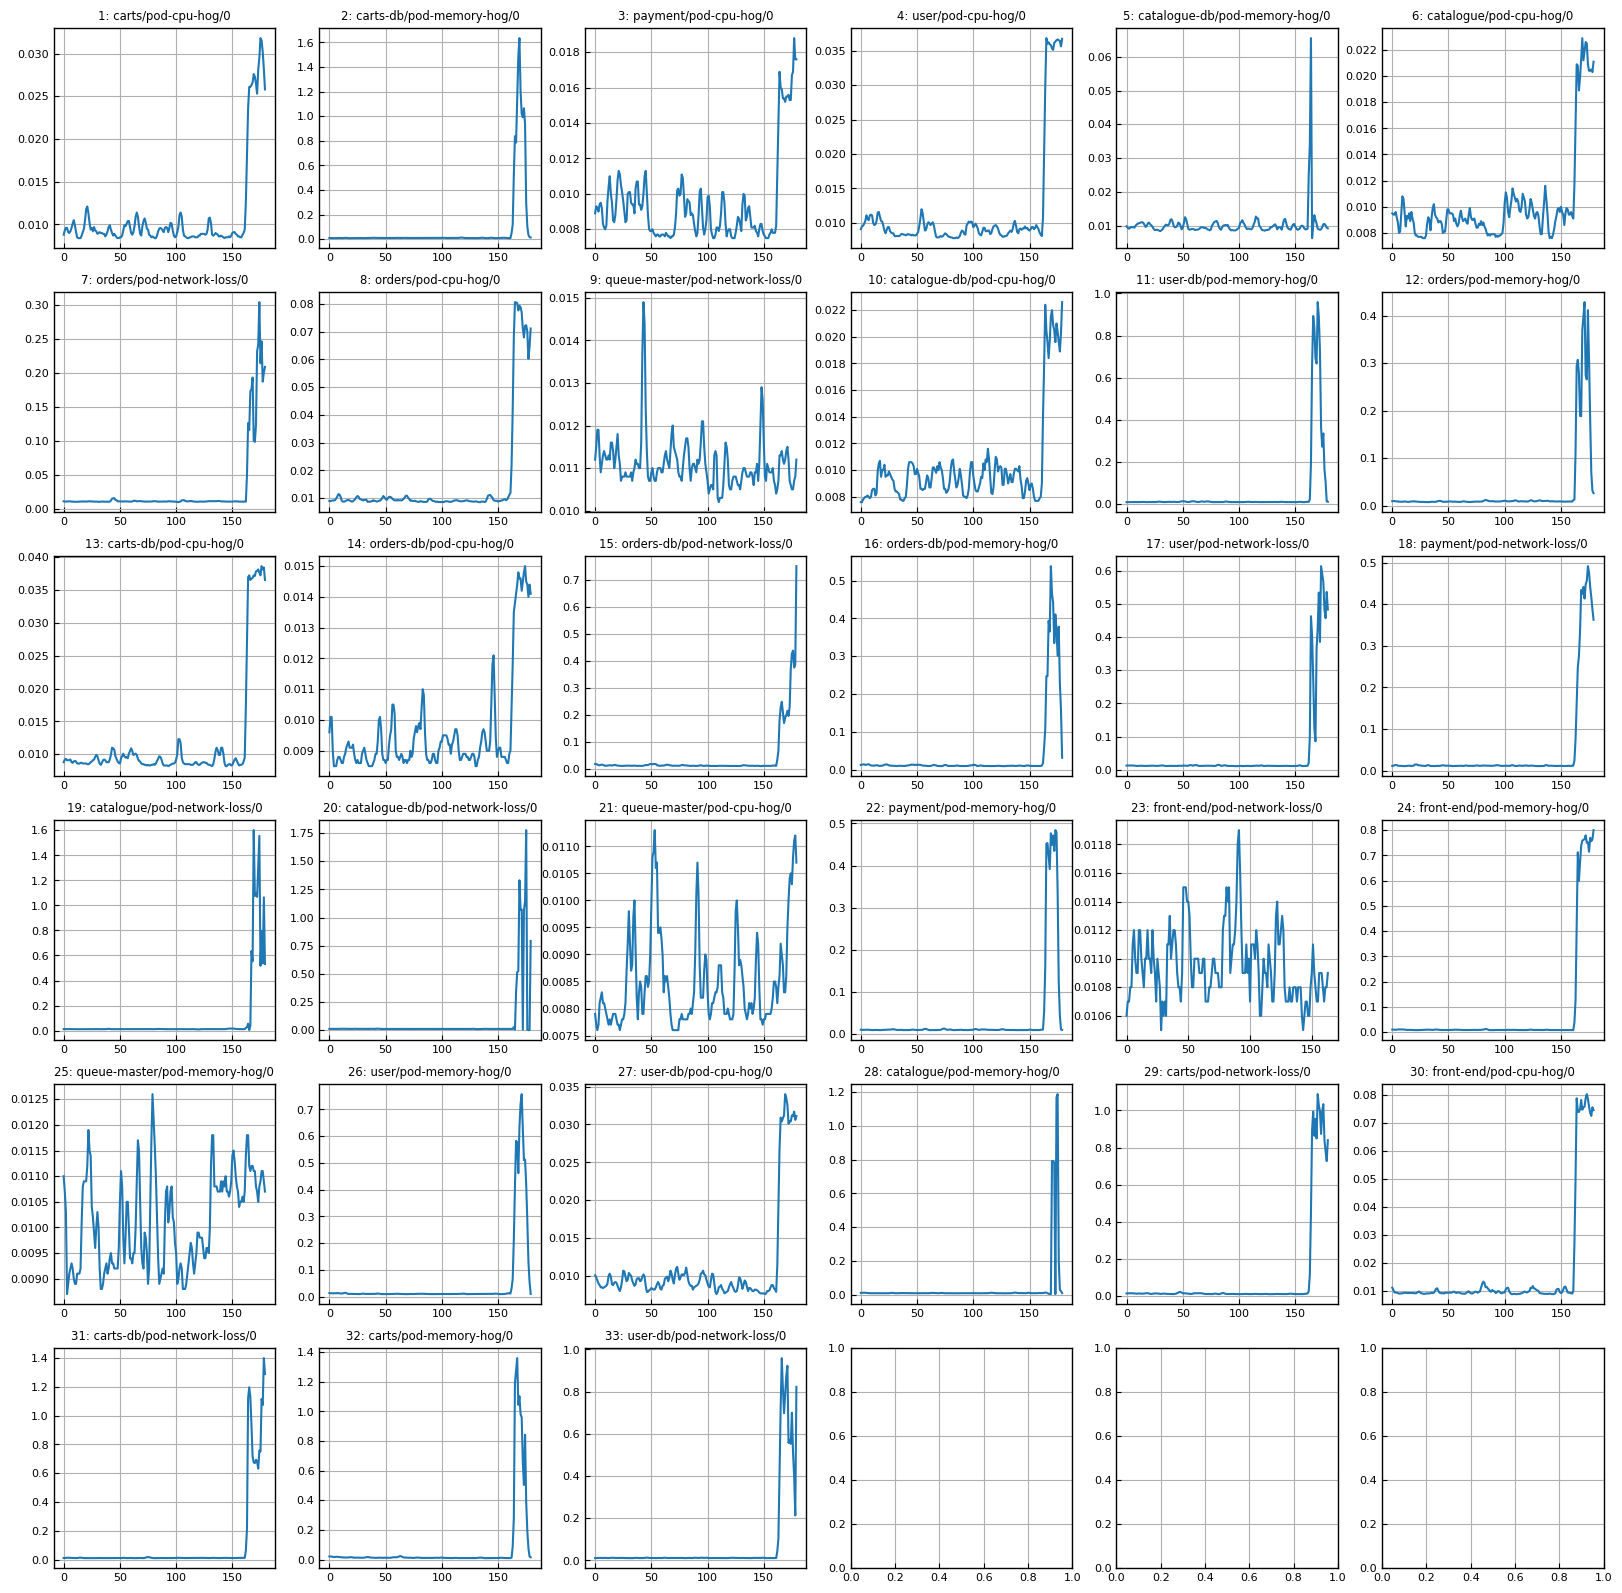

In [26]:
import math

slis_fig = plt.figure(figsize=(20, 50))
slis_fig, slis_axs = plt.subplots(math.ceil(len(datasets_after_tsdr)/6), 6, figsize=(20, 20))
for i, (slis_ax, (record, _, _, _)) in enumerate(zip(slis_axs.flatten(), datasets_after_tsdr)):
    sli_name = record.pk.get_root_metrics()[0]
    slis_ax.plot(record.data_df[sli_name].to_numpy())
    title = f"{i+1}: {record.chaos_case_full()}"
    slis_ax.set_title(title)
    print(title)

In [27]:
from tsdr.outlierdetection.n_sigma_rule import detect_with_n_sigma_rule

results = []
for record, _, _, _ in datasets_after_tsdr:
    sli_name = record.pk.get_root_metrics()[0]
    ok: bool = detect_with_n_sigma_rule(
        x=record.data_df[sli_name].to_numpy(),
        test_start_time=record.data_df.shape[0] - 20,
    ).size > 0
    results.append((record.chaos_case_full(), ok))
df = pd.DataFrame(results, columns=["chaos_case", "ok"]).query("ok == False")
df.index += 1
df

,chaos_case,ok
9,queue-master/pod-network-loss/0,False
23,front-end/pod-network-loss/0,False
25,queue-master/pod-memory-hog/0,False


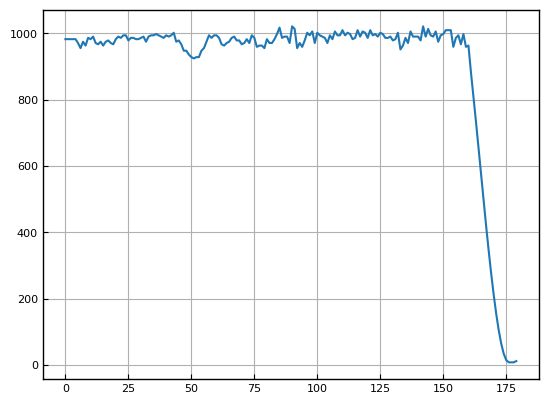

In [28]:
for record, filtered_df, _, _ in datasets_after_tsdr:
    if record.chaos_comp() == "orders-db" and record.chaos_type() == "pod-network-loss":
        filtered_df["m-orders_Tomcat_RequestProcessor_bytesReceived"].plot()

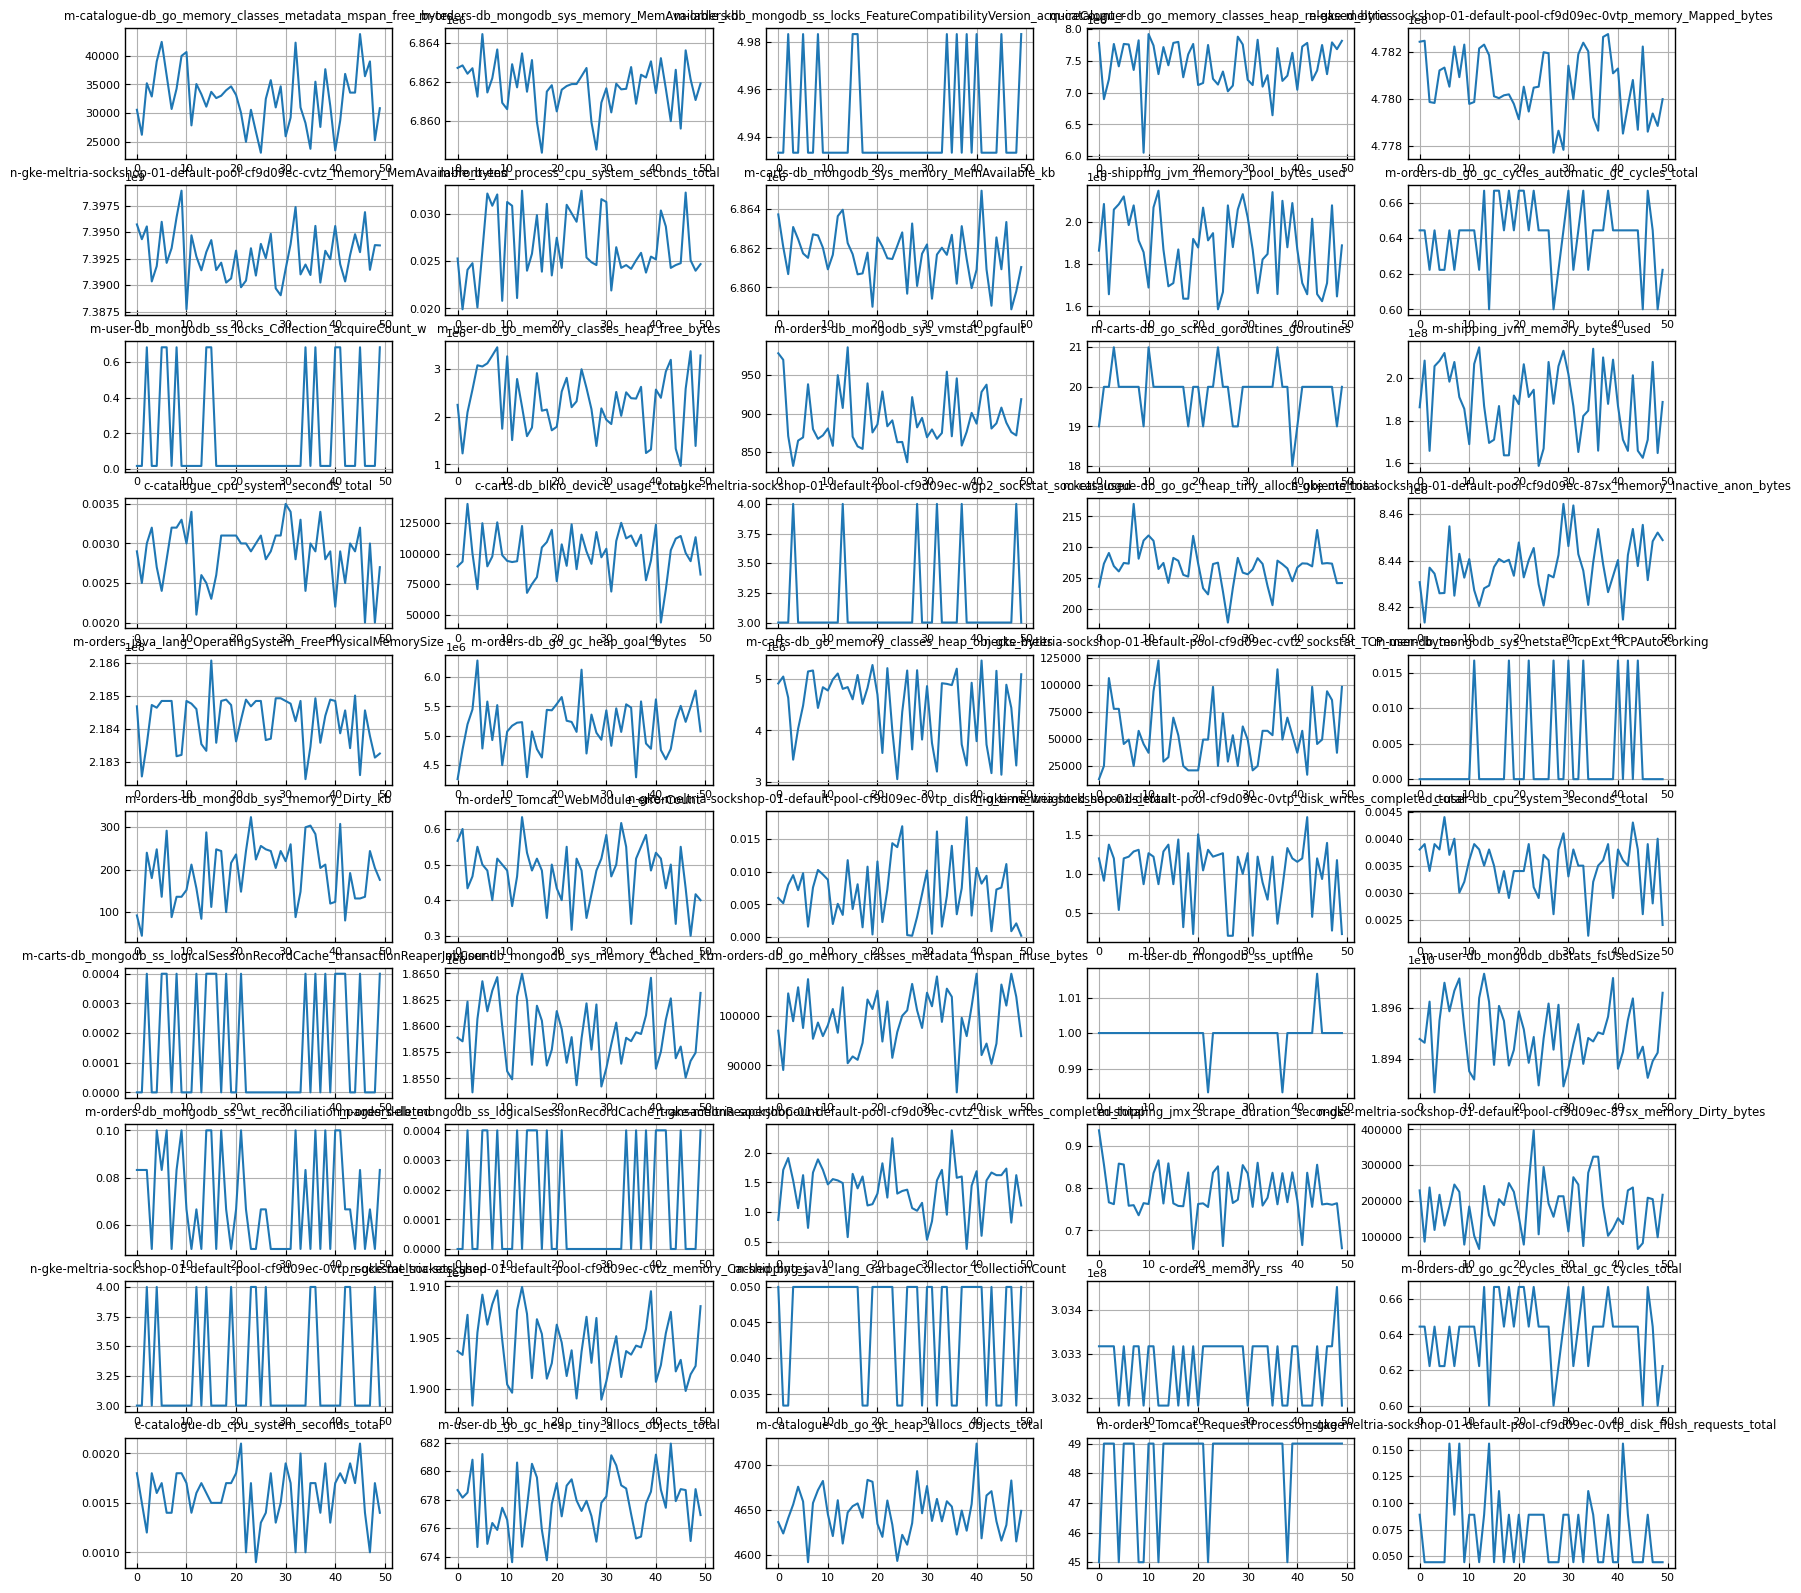

In [30]:
import math

record, filtered_df, anomalous_df, _ = datasets_after_tsdr[0]
diff_columns = list(set(filtered_df.columns.tolist()) - set(anomalous_df.columns.tolist()))
sampled_filtered_df = filtered_df[diff_columns].sample(n=50)
fig = plt.figure(figsize=(20, 20))
axs = fig.subplots(nrows=math.ceil(sampled_filtered_df.shape[0] / 5), ncols=5)
for ax, (label, row) in zip(axs.flatten(), sampled_filtered_df.items()):
    ax.plot(row.to_numpy())
    ax.set_title(label)

In [32]:
results = []
for label, ts in sampled_filtered_df.items():
    results.append(((DATASET_ID, record.target_app(), record.chaos_type(), record.chaos_comp(), label, ts.tolist())))
pd.DataFrame(results, columns=["dataset_id", "target_app", "chaos_type", "chaos_comp","metric", "time_series"]).to_json(path_or_buf="../../no_anomalous_metrics_samples.json", index=True)